## Warnings and Imports

In [1]:
# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
# all other imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [3]:
# set plot styles
plt.style.use('fivethirtyeight')

## Data load and Exploratory Data Analysis

In [4]:
# read and show data
df = pd.read_csv('../input/sloan-digital-sky-survey/Skyserver_SQL2_27_2018 6_51_39 PM.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [5]:
# statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
objid,10000.0,1.237650e+18,0.000000e+00,1.237650e+18,1.237650e+18,1.237650e+18,1.237650e+18,1.237650e+18
ra,10000.0,1.755300e+02,4.778344e+01,8.235100e+00,1.573709e+02,1.803945e+02,2.015473e+02,2.608844e+02
dec,10000.0,1.483615e+01,2.521221e+01,-5.382632e+00,-5.390350e-01,4.041660e-01,3.564940e+01,6.854227e+01
u,10000.0,1.861936e+01,8.286560e-01,1.298897e+01,1.817803e+01,1.885309e+01,1.925923e+01,1.959990e+01
g,10000.0,1.737193e+01,9.454572e-01,1.279955e+01,1.681510e+01,1.749513e+01,1.801015e+01,1.991897e+01
r,10000.0,1.684096e+01,1.067764e+00,1.243160e+01,1.617333e+01,1.685877e+01,1.751267e+01,2.480204e+01
i,10000.0,1.658358e+01,1.141805e+00,1.194721e+01,1.585370e+01,1.655499e+01,1.725855e+01,2.817963e+01
z,10000.0,1.642283e+01,1.203188e+00,1.161041e+01,1.561829e+01,1.638994e+01,1.714145e+01,2.283306e+01
run,10000.0,9.810348e+02,2.733050e+02,3.080000e+02,7.520000e+02,7.560000e+02,1.331000e+03,1.412000e+03
rerun,10000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [6]:
# check for nan values
print(f"Columns with missing values: \n{df.isna().any()}")

Columns with missing values: 
objid        False
ra           False
dec          False
u            False
g            False
r            False
i            False
z            False
run          False
rerun        False
camcol       False
field        False
specobjid    False
class        False
redshift     False
plate        False
mjd          False
fiberid      False
dtype: bool


In [7]:
# get data mean as part of data analysis
df.mean()

objid        1.237650e+18
ra           1.755300e+02
dec          1.483615e+01
u            1.861936e+01
g            1.737193e+01
r            1.684096e+01
i            1.658358e+01
z            1.642283e+01
run          9.810348e+02
rerun        3.010000e+02
camcol       3.648700e+00
field        3.023801e+02
specobjid    1.645022e+18
redshift     1.437257e-01
plate        1.460986e+03
mjd          5.294353e+04
fiberid      3.530694e+02
dtype: float64

<Axes: >

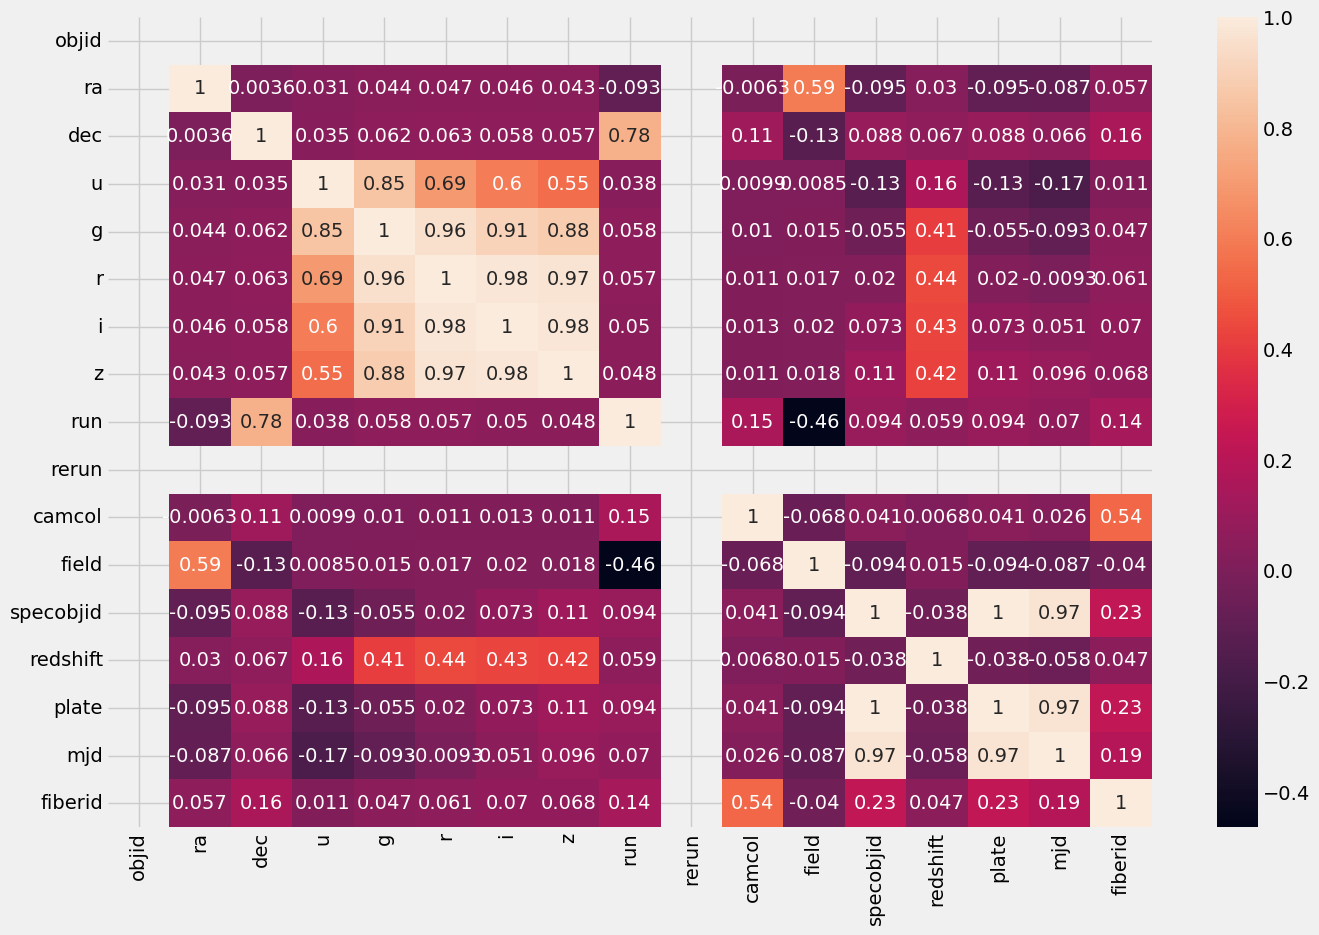

In [8]:
# get correlation heatmap for better understanding
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

## Data Formatting

In [9]:
# create attributes and target 
X = df.drop(['class'],axis='columns')
y = df['class']

In [10]:
# scaling and normalization
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

X_scaled = standard_scaler.fit_transform(X)
X_new = minmax_scaler.fit_transform(X_scaled)

In [11]:
# label encoding target column and storing a list of classes
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

class_mapping = {class_label: encoded_value for class_label, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
class_prints = []

for class_label, encoded_value in class_mapping.items():
    print(f"{class_label}: {encoded_value}")
    class_prints.append(class_label)

class_prints

GALAXY: 0
QSO: 1
STAR: 2


['GALAXY', 'QSO', 'STAR']

## Feature Selection

In [12]:
# setting number of features
num_feats = 10

# anova
anova_selector = SelectKBest(score_func=f_classif, k=num_feats) 
X_anova_selected = anova_selector.fit_transform(X_new, y_encoded)

#chi2
chi2_selector = SelectKBest(score_func=chi2, k=num_feats) 
X_chi2_selected = chi2_selector.fit_transform(X_new, y_encoded)

selected_features_anova_indices = anova_selector.get_support(indices=True)
print("Selected features using ANOVA:", selected_features_anova_indices)
selected_features_chi2_indices = chi2_selector.get_support(indices=True)
print("Selected features using chi-squared:", selected_features_chi2_indices)

# get final feature column indices to use
if not np.array_equal(selected_features_anova_indices, selected_features_chi2_indices):
    common_feats = np.intersect1d(selected_features_anova_indices, selected_features_chi2_indices)
    print("Common features from the two selectors:", common_feats)
    print("Final number of features =", len(common_feats))
else:
    common_feats = selected_features_anova_indices
    print("Both selectors gave same results")

Selected features using ANOVA: [ 3  4  5  6  7  8 12 13 14 15]
Selected features using chi-squared: [ 2  3  4  5  6  7 12 13 14 15]
Common features from the two selectors: [ 3  4  5  6  7 12 13 14 15]
Final number of features = 9


In [13]:
# create final attribute dataframe
final_X = pd.DataFrame(X_new).iloc[:, common_feats]

## Training-Test split

In [14]:
# splitting for training and testing
X_train, X_test, y_train, y_test = train_test_split(final_X, y_encoded, test_size=0.2, shuffle=True, random_state=42)

## Classification

In [15]:
def conf_mat_plotter(conf_mat):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_prints, yticklabels=class_prints)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy: 0.991


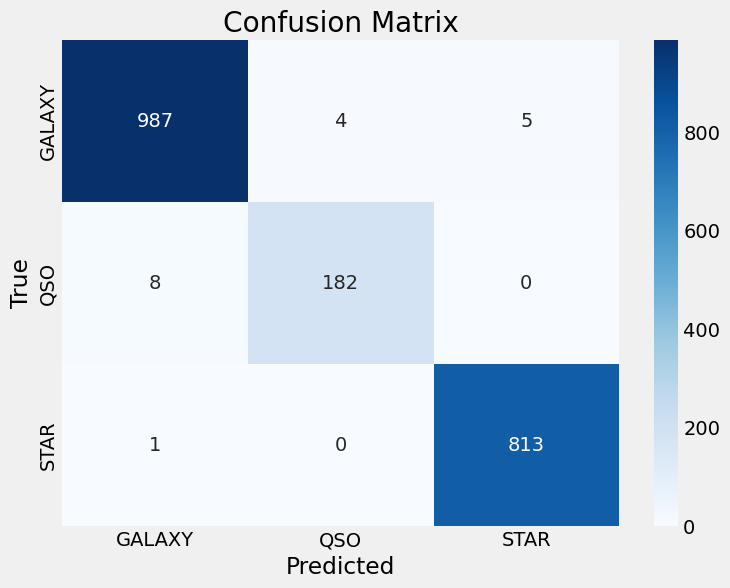

In [16]:
# classification with Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# metrics
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)
rf_conf_matrix = confusion_matrix(y_test, y_pred)

conf_mat_plotter(rf_conf_matrix)

Accuracy: 0.994


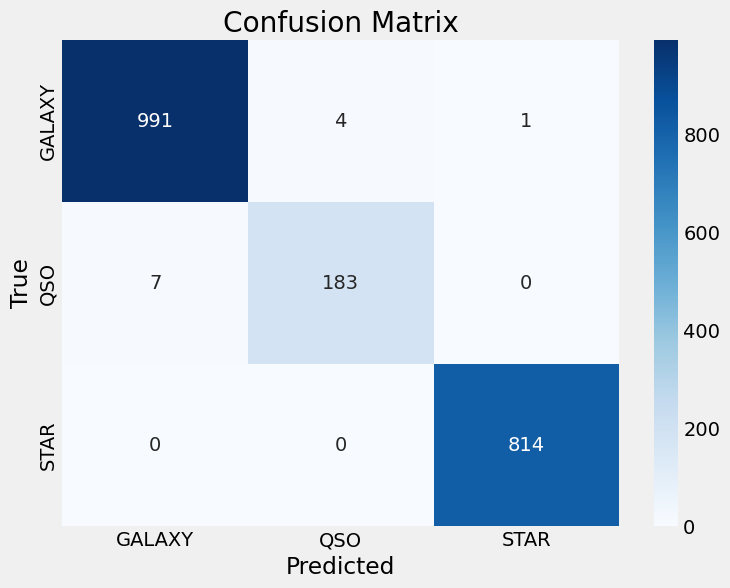

In [17]:
# classification with XGBoost
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)

# metrics
xgb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", xgb_accuracy)
xgb_conf_matrix = confusion_matrix(y_test, y_pred)

conf_mat_plotter(xgb_conf_matrix)

## Best Accuracy: 99.4%
Parameters for best accuracy: features=10, test size=0.2, classifier=XGBoost